# 作業 3


## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|Colaboratory||
|python 版本|python3|3.6.9|
|安裝環境|pip|20.0.2|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 參考連結

- 有無參考他人之實驗結果：無
- 參考連結：

In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 繪圖函式庫

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('trainingset.csv')      # 讀取訓練資料，請勿更改路徑
test = pd.read_csv('testingset.csv')     # 讀取預測資料

print(df)                                #查看訓練資料的內容
df.info()                                #查看訓練資料相關資訊是否缺失以及類型


             Date  Open Price  Close Price  High Price  Low Price      Volume
0     02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1     05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2     06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3     07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4     08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
...           ...         ...          ...         ...        ...         ...
2259  22-Dec-2017     2684.22      2683.34     2685.35    2678.13  1383888512
2260  26-Dec-2017     2679.09      2680.50     2682.74    2677.96  1103808384
2261  27-Dec-2017     2682.10      2682.62     2685.64    2678.91  1149108352
2262  28-Dec-2017     2686.10      2687.54     2687.66    2682.69  1126089856
2263  29-Dec-2017     2689.15      2673.61     2692.12    2673.61  1332374016

[2264 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
R

## 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目可以包含：

- 資料視覺化
- 相關係數
- 決定輸入特徵
- 處理缺失值
- 轉換數值
- 轉換類別
- 其他

請以 `markdown` 簡單描述**流程**、**方法**與**原因**：

1. 觀察...，發現...
2. 填補...，策略...
3. 轉換...，原因...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


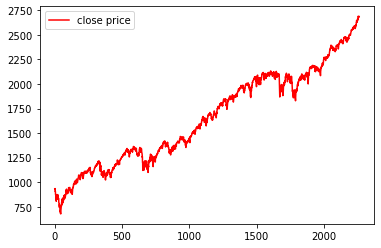

-----------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
# 資料分析與前處理
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder

train_x = df[['Date', 'Open Price', 'High Price', 'Low Price', 'Volume']]       # 取出訓練資料需要分析的資料欄位
train_y = df['Close Price']           #取出訓練資料答案的欄位

le = LabelEncoder()                             # 創造 Label Encoder
le.fit(train_x['Date'])                         # 由於日期不為單純數字，因此給予日期的每個類別一個數值
train_x['Date'] = le.transform(train_x['Date']) # 轉換所有類別成為數值

train_datanumber = len(train_x['Volume'])     #資料筆數
train_trend = pd.Series(dtype=float)        #創建一紀錄漲跌的空series

for i in range(0, train_datanumber-1):          #將當天與隔天之close price互相比較 若當天較高則跌設為0 若隔天較高則漲設為1
  if df['Close Price'][i] > df['Close Price'][i+1]:
    train_trend = train_trend.append(pd.Series(0))
  else:
    train_trend = train_trend.append(pd.Series(1))

train_y = train_trend.to_frame()                       # 輸入訓練資料的答案

train_x = train_x.drop(index=[train_datanumber-1])            # 由於最後一筆資料無隔天資料因此刪除

x = range(0, train_datanumber-1)                      # 畫出時間與收盤價之關係圖
y = df['Close Price'].drop(index=[train_datanumber-1])

plt.plot(x, y, color='red', label='close price')

plt.legend()
plt.show()


test_x = test[['Date', 'Open Price', 'High Price', 'Low Price', 'Volume']]      # 取出預測測試資料需要的資料欄位
test_y = test['Close Price']               #取出預測資料答案的欄位

le = LabelEncoder()                             # 創造 Label Encoder
le.fit(test_x['Date'])                          # 由於日期不為單純數字，因此給予日期的每個類別一個數值
test_x['Date'] = le.transform(test_x['Date'])   # 轉換所有類別成為數值

test_datanumber = len(test_x['Volume'])       #測試資料筆數
test_trend = pd.Series(dtype=float)         #創建一紀錄漲跌的空series

for i in range(0, test_datanumber-1):      #將當天與隔天之close price互相比較 若當天較高則跌設為0 若隔天較高則漲設為1
  if test['Close Price'][i] > test['Close Price'][i+1]:
    test_trend = test_trend.append(pd.Series(0))
  else:
    test_trend = test_trend.append(pd.Series(1))

test_y = test_trend.to_frame()                  # 輸入測試資料的答案

test_x = test_x.drop(index=[test_datanumber-1]) # 由於最後一筆資料無隔天資料因此刪除


## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，**需要**包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
    - 準確度必須**超越**課堂使用的範例
    
如果有進行多於一個以上的實驗，**可以保留所有**的實驗結果，但是執行時間將會納入**全部**實驗。

In [3]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.ensemble import RandomForestClassifier   # 匯入隨機森林模型
from sklearn.naive_bayes import GaussianNB            # 匯入簡單貝氏模型
from sklearn import preprocessing, linear_model       # 匯入羅吉斯回歸模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值，切成五份
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list_lr = []                                   # 儲存羅吉斯回歸每次訓練模型的準確度
valid_acc_list_lr = []                                   # 儲存羅吉斯回歸每次驗證模型的準確度
train_acc_list_rf = []                                   # 儲存隨機森林每次訓練模型的準確度
valid_acc_list_rf = []                                   # 儲存隨機森林每次驗證模型的準確度
train_acc_list_nb = []                                   # 儲存簡單貝氏每次訓練模型的準確度
valid_acc_list_nb = []                                   # 儲存簡單貝氏每次驗證模型的準確度


for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    lrmodel = linear_model.LogisticRegression(random_state=1012)             # 創造羅吉斯回歸模型
    lrmodel.fit(train_x_split, train_y_split.to_numpy().flatten())           # 訓練羅吉斯回歸模型
    
    train_pred_y_lr = lrmodel.predict(train_x_split)     # 確認羅吉斯回歸模型是否訓練成功
    train_acc_lr = accuracy_score(train_y_split,         # 計算羅吉斯回歸訓練資料準確度
                               train_pred_y_lr)
    valid_pred_y_lr = lrmodel.predict(valid_x_split)     # 驗證羅吉斯回歸模型是否訓練成功
    valid_acc_lr = accuracy_score(valid_y_split,         # 計算羅吉斯回歸驗證資料準確度
                               valid_pred_y_lr)
    
    train_acc_list_lr.append(train_acc_lr)               # 將準度加到儲存羅吉斯回歸訓練模型的list中
    valid_acc_list_lr.append(valid_acc_lr)               # 將準度加到儲存羅吉斯回歸驗證模型的list中


    rfmodel = RandomForestClassifier(random_state=1012)                      # 創造隨機森林模型
    rfmodel.fit(train_x_split, train_y_split.to_numpy().flatten())           # 訓練隨機森林模型
    
    train_pred_y_rf = rfmodel.predict(train_x_split)       # 確認隨機森林模型是否訓練成功
    train_acc_rf = accuracy_score(train_y_split,           # 計算隨機森林訓練資料準確度
                               train_pred_y_rf)
    valid_pred_y_rf = rfmodel.predict(valid_x_split)       # 驗證隨機森林模型是否訓練成功
    valid_acc_rf = accuracy_score(valid_y_split,           # 計算隨機森林驗證資料準確度
                               valid_pred_y_rf)
    
    train_acc_list_rf.append(train_acc_rf)                 # 將準度加到儲存隨機森林訓練模型的list中
    valid_acc_list_rf.append(valid_acc_rf)                 # 將準度加到儲存隨機森林驗證模型的list中


    nbmodel = GaussianNB()                                                # 創造簡單貝氏模型
    nbmodel.fit(train_x_split, train_y_split.to_numpy().flatten())        # 訓練簡單貝氏模型
    
    train_pred_y_nb = nbmodel.predict(train_x_split)       # 確認簡單貝氏模型是否訓練成功
    train_acc_nb = accuracy_score(train_y_split,           # 計算簡單貝氏訓練資料準確度
                               train_pred_y_nb)
    valid_pred_y_nb = nbmodel.predict(valid_x_split)       # 驗證簡單貝氏模型是否訓練成功
    valid_acc_nb = accuracy_score(valid_y_split,           # 計算簡單貝氏驗證資料準確度
                               valid_pred_y_nb)
    
    train_acc_list_nb.append(train_acc_nb)                 # 將準度加到儲存簡單貝氏訓練模型的list中
    valid_acc_list_nb.append(valid_acc_nb)                 # 將準度加到儲存簡單貝氏訓練模型的list中

    

print((
    'logistic regression average train accuracy: {}\n' +
    '                        min train accuracy: {}\n' +
    '                        max train accuracy: {}\n' +
    'logistic regression average valid accuracy: {}\n' +
    '                        min valid accuracy: {}\n' +
    '                        max valid accuracy: {}').format(
    np.mean(train_acc_list_lr),                          # 輸出平均訓練準確度
    np.min(train_acc_list_lr),                           # 輸出最低訓練準確度
    np.max(train_acc_list_lr),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_lr),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_lr),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_lr)                            # 輸出最高驗證準確度
))

test_pred_y_lr = lrmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_lr = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_lr)
print(('logistic regression test accuracy: {}\n').format(test_acc_lr))



print((
    'random forest average train accuracy: {}\n' +
    '                  min train accuracy: {}\n' +
    '                  max train accuracy: {}\n' +
    'random forest average valid accuracy: {}\n' +
    '                  min valid accuracy: {}\n' +
    '                  max valid accuracy: {}').format(
    np.mean(train_acc_list_rf),                          # 輸出平均訓練準確度
    np.min(train_acc_list_rf),                           # 輸出最低訓練準確度
    np.max(train_acc_list_rf),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_rf),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_rf),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_rf)                            # 輸出最高驗證準確度
))

test_pred_y_rf = rfmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_rf = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_rf)
print(('random forest test accuracy: {}\n').format(test_acc_rf))

print((
    'naive bayes average train accuracy: {}\n' +
    '                min train accuracy: {}\n' +
    '                max train accuracy: {}\n' +
    'naive bayes average valid accuracy: {}\n' +
    '                min valid accuracy: {}\n' +
    '                max valid accuracy: {}').format(
    np.mean(train_acc_list_nb),                          # 輸出平均訓練準確度
    np.min(train_acc_list_nb),                           # 輸出最低訓練準確度
    np.max(train_acc_list_nb),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_nb),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_nb),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_nb)                            # 輸出最高驗證準確度
))

test_pred_y_nb = nbmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_nb = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_nb)
print(('naive bayes test accuracy: {}\n').format(test_acc_nb))

logistic regression average train accuracy: 0.5475044769380489
                        min train accuracy: 0.5383765875207068
                        max train accuracy: 0.5552486187845304
logistic regression average valid accuracy: 0.5475219285393347
                        min valid accuracy: 0.5165562913907285
                        max valid accuracy: 0.584070796460177
logistic regression test accuracy: 0.5258964143426295

random forest average train accuracy: 1.0
                  min train accuracy: 1.0
                  max train accuracy: 1.0
random forest average valid accuracy: 0.5037547129266053
                  min valid accuracy: 0.4756637168141593
                  max valid accuracy: 0.5287610619469026
random forest test accuracy: 0.4940239043824701

naive bayes average train accuracy: 0.5470629761036758
                min train accuracy: 0.5350635008282717
                max train accuracy: 0.5574585635359116
naive bayes average valid accuracy: 0.5430961730059192
  

In [4]:
from sklearn.neural_network import MLPClassifier    #匯入MLP分類器的函式庫
nnmodel = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='adaptive'
                          , learning_rate_init=0.001, max_iter=500).fit(train_x, train_y.to_numpy().flatten())
   #使用MLP分類器 有100層隱藏層，啟動函數使用羅吉斯，優化方法選擇SGD，讓學習率為可變動的，最多迭代五百次

test_pred_y_nn = nnmodel.predict(test_x)       # 驗證神經網路模型是否訓練成功
test_acc_nn = accuracy_score(test_y,           # 計算神經網路驗證資料準確度
                           test_pred_y_nn)
print(('neural network test accuracy: {}\n').format(test_acc_nn))

neural network test accuracy: 0.5258964143426295



In [5]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 6.085763692855835
